# Lab-Assignment-6

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [22]:
# function for read data from csv and copying of sequence to numpy vector
def load_dataset():
    num_rows = sum(1 for line in open('Linear-Ression_data.csv'))-2
    X = np.zeros((num_rows, 1))
    Y = np.zeros((num_rows, 1))
    with open('Linear-Ression_data.csv') as f:
        reader = csv.DictReader(f, delimiter=',')
        next(reader, None)
        for i, row in enumerate(reader):
            X[i] = float(row['GPA']) if len(row['GPA']) > 0 else 0
            Y[i] = int(row['SAT']) if len(row['SAT']) > 0 else 0
    return X, Y

In [24]:
X, Y = load_dataset()

def mean(data):
    return sum(data) / float(len(data))

def variance(data):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data)/n

def stdev(data):
    var = variance(data)
    std_dev = (var)**0.5
    return std_dev

X_mean = mean(X)
Y_mean = mean(Y)

std_X = stdev(X)
std_Y = stdev(Y)
print("Means of X and Y are :", X_mean, Y_mean)
print("Standard deviation of X and Y are ", std_X, std_Y)

Means of X and Y are : [3.34144578] [1846.85542169]
Standard deviation of X and Y are  [0.25144466] [103.52069027]


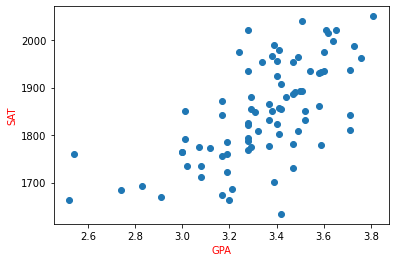

In [4]:
# scatter plot of data
def visualize_dataset(X, Y):
    plt.xlabel('GPA',color ='red')
    plt.ylabel('SAT',color ='red')
    plt.scatter(X, Y)
    plt.show()
if __name__ == '__main__':
    X, Y = load_dataset()
    visualize_dataset(X, Y)

In [25]:
#checking for association
def correlation(x, x_mean, y, y_mean, std_x, std_y):
    n = len(x)
    corr = (sum(((x-x_mean)/std_x)*((y-y_mean)/std_y)))/(n)
    return corr

corr = correlation(X, X_mean, Y, Y_mean, std_X, std_Y)
print("Association between X and Y is ", corr)

Association between X and Y is  [0.63781454]


In [26]:
# Fit the model
# 6.1 Compute Beta_0 and Beta_1 from observations
# 6.2. Create your fitted line y = Beta_0 + Beta_1 * X 

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
    
beta1 = num / den
beta0 = Y_mean - beta1*X_mean
print("the value of beta-1 :", beta1, "\nthe value of beta-0 : ", beta0)

the value of beta-1 : [262.59059173] 
the value of beta-0 :  [969.42319626]


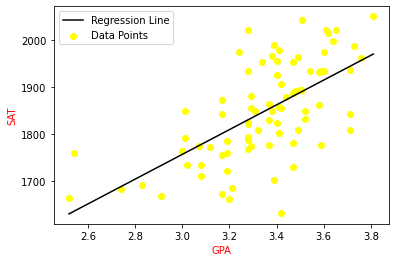

In [8]:
# Plot the fitted line 
# Making predictions
Y_pred = beta1*X + beta0

plt.scatter(X, Y,color='yellow', label='Data Points') # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='black', label='Regression Line') # predicted
plt.xlabel('GPA', color = 'red')
plt.ylabel('SAT', color = 'red')
plt.legend()
plt.show()

In [27]:
# Calculate R-Square
ss_total  = 0
ss_residual = 0
for i in range(len(X)):
    Y_pred = beta1*X[i] + beta0
    ss_total += (Y[i] - Y_mean) ** 2
    ss_residual += (Y[i] - Y_pred) ** 2

r_square = 1 - (ss_residual/ss_total)
print("The R-square is : ", r_square)

The R-square is :  [0.40680739]


In [28]:
# Create Anova Table
# let's find attributes of anova table 
# we know the degree of freedom for regression is 1 for residual is n-2 and total is n-1
ss_regression = 0.0
ss_residual = 0.0
for i in range(len(X)):
    Y_pred = beta1*X[i] + beta0
    ss_regression += (Y_pred-Y_mean)**2
    ss_residual += (Y[i]-Y_pred)**2
    
print("SS_regression :", ss_regression, "\nSS_residual:", ss_residual,"\nSS_total :", ss_regression+ss_residual)

SS_regression : [361843.88756956] 
SS_residual: [527628.37749068] 
SS_total : [889472.26506024]


In [30]:
n = len(X)
ms_regression = (ss_regression/1)
ms_residual = (ss_residual/(n-2))
print("MS Regression :", ms_regression, "\nMS Residual :", ms_residual)

MS Regression : [361843.88756956] 
MS Residual : [6513.9305863]


In [31]:
F_stats = (ms_regression/ms_residual)
print("F-stats for data : ", F_stats)
std_Error = (ms_residual**0.5) 
print("Standared Error :", std_Error)

F-stats for data :  [55.54923909]
Standared Error : [80.70892507]


In [34]:
# anova table
F_significant = 7.19952E-11 #from table
print("ANOVA\n","\t\t","degree of freedom\t\t", "SS\t\t", "MS\t\t", "\tF-stats\t", "\t\tsignificance-F")
print("\nRegression\t\t", 1, "\t\t", ss_regression, "\t", ms_regression, "\t", F_stats, "\t\t", F_significant)
print("\nResidual\t", "83-2 =", 81, "\t\t", ss_residual, "\t", ms_residual )
print("\nTotal\t\t", "83-1 =", 82, "\t\t", ss_regression+ss_residual )

ANOVA
 		 degree of freedom		 SS		 MS		 	F-stats	 		significance-F

Regression		 1 		 [361843.88756956] 	 [361843.88756956] 	 [55.54923909] 		 7.19952e-11

Residual	 83-2 = 81 		 [527628.37749068] 	 [6513.9305863]

Total		 83-1 = 82 		 [889472.26506024]
